In [131]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#read csv into pandas
movie=pd.read_csv('full_movies.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,14,38,39,40,41,50,51,52,58,59,60,65,67,75,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
#pandas dataframe
movies=pd.DataFrame(movie)

In [134]:
#list of columns we are going to drop
col_drop=['Unnamed: 0','Unnamed: 0.1','adult','backdrop_path','poster_path','genres_8','genres_9','production_companies_10','production_companies_11','production_companies_12','production_companies_13','production_companies_14','production_companies_15','production_companies_16','production_companies_17','production_companies_18','production_companies_19','production_companies_20','production_companies_21','production_companies_22','production_companies_23','production_companies_24','production_companies_25','production_companies_26','production_companies_3','production_companies_4','production_companies_5','production_countries_6','production_companies_6','production_companies_7','production_companies_8','production_companies_9','production_countries_10','production_companies_11','production_countries_12','production_countries_4','production_countries_5','production_countries_6','production_companies_7','production_countries_8','production_countries_9','spoken_languages_10','spoken_languages_11','spoken_languages_12','spoken_languages_4','spoken_languages_5','spoken_languages_6','spoken_languages_7','spoken_languages_8','spoken_languages_9','imdb_writers_3','imdb_writers_4']


         
         

In [135]:
#dropped them
movies = movies.drop(col_drop,axis=1)

In [136]:
#reoder the columns 
df=movies[['title','budget','genres_1','popularity','imdb_stars_1','imdb_stars_2','imdb_stars_3','num_genres','imdb_user_reviews','imdb_rating','imdb_critic_reviews','release_date','vote_count','revenue','production_companies_1','runtime','vote_average']]
                    
                    
                    
                    
                    
                    
    

In [157]:
#put into sql database
import sqlite3 
connection = sqlite3.connect('movies_database.db')
cursor = connection.cursor()


In [154]:
df=pd.DataFrame(df)

In [158]:
df.to_sql('df', connection, if_exists='replace')

In [162]:
cursor.execute('''Select * from df;''').fetchall()

[(3,
  'Bumblebee',
  135000000.0,
  'Action',
  226.241,
  'Hailee Steinfeld',
  ' Jorge Lendeborg Jr.',
  ' John Cena',
  3.0,
  907.0,
  7.0,
  231.0,
  '2018-12-15 00:00:00',
  1574.0,
  420361283.0,
  'Hasbro',
  114.0,
  6.5,
  2018.0,
  128295953.47326797,
  -6704046.5267320275),
 (4,
  'The Mule',
  50000000.0,
  'Crime',
  166.435,
  None,
  None,
  None,
  3.0,
  None,
  None,
  None,
  '2018-12-14 00:00:00',
  977.0,
  64738465.0,
  'Imperative Entertainment',
  116.0,
  6.5,
  2018.0,
  19758439.77422342,
  -30241560.22577658),
 (6,
  'Avengers: Infinity War',
  300000000.0,
  'Adventure',
  137.906,
  'Robert Downey Jr.',
  ' Chris Hemsworth',
  ' Mark Ruffalo',
  3.0,
  3841.0,
  8.5,
  560.0,
  '2018-04-25 00:00:00',
  12289.0,
  2046239637.0,
  'Marvel Studios',
  149.0,
  8.3,
  2018.0,
  624520563.3357741,
  324520563.33577406),
 (9,
  'Aquaman',
  160000000.0,
  'Action',
  129.40200000000002,
  'Jason Momoa',
  ' Amber Heard',
  ' Willem Dafoe',
  4.0,
  3092.0,
  7

In [137]:
#cleaned up year and created a filter of movies between 2012 and 2018
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df=df[df['year']>=2012]
df=df[df['year']<=2018]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
#filtering out very low budgets and revenues
#scaling factor on real revenue
#added an adjusted_profit column and real revenue column
df=df[df.budget>5*10**6]
df=df[df.revenue>10**6]
scaling_factor= np.mean(df.revenue)/ np.mean(df.budget)
df['real_revenue']=df.revenue/scaling_factor
df['adjusted_profit']= df.real_revenue- df.budget

In [163]:
scaling_factor

3.276496815525732

In [139]:
#down from 19000 to 1,000 movies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 3 to 18124
Data columns (total 20 columns):
title                     1056 non-null object
budget                    1056 non-null float64
genres_1                  1056 non-null object
popularity                1056 non-null float64
imdb_stars_1              1001 non-null object
imdb_stars_2              1000 non-null object
imdb_stars_3              1000 non-null object
num_genres                1056 non-null float64
imdb_user_reviews         1003 non-null float64
imdb_rating               1003 non-null float64
imdb_critic_reviews       1003 non-null float64
release_date              1056 non-null datetime64[ns]
vote_count                1056 non-null float64
revenue                   1056 non-null float64
production_companies_1    1056 non-null object
runtime                   1054 non-null float64
vote_average              1056 non-null float64
year                      1056 non-null float64
real_revenue              1

In [140]:
df.describe()

,budget,popularity,num_genres,imdb_user_reviews,imdb_rating,imdb_critic_reviews,vote_count,revenue,runtime,vote_average,year,real_revenue,adjusted_profit
count,1.056000e+03,1056.000000,1056.000000,1003.000000,1003.000000,1003.000000,1056.000000,1.056000e+03,1054.000000,1056.000000,1056.000000,1.056000e+03,1.056000e+03
mean,5.219170e+07,14.310887,2.664773,394.619143,6.500798,257.723829,2365.803030,1.710060e+08,112.990512,6.445076,2014.899621,5.219170e+07,-1.756813e-08
std,5.665002e+07,14.123070,1.112331,518.763920,0.899190,166.237453,2890.843574,2.609343e+08,18.128797,0.760640,1.935784,7.963820e+07,5.159404e+07
min,5.200000e+06,3.314000,1.000000,0.000000,3.100000,3.000000,9.000000,1.005909e+06,76.000000,3.900000,2012.000000,3.070075e+05,-2.991989e+08
25%,1.495000e+07,8.128750,2.000000,118.000000,5.900000,135.500000,456.250000,2.291964e+07,99.000000,5.900000,2013.000000,6.995166e+06,-1.953799e+07
50%,3.000000e+07,10.785500,3.000000,221.000000,6.500000,231.000000,1238.000000,6.842012e+07,111.000000,6.400000,2015.000000,2.088210e+07,-6.652267e+06
75%,6.500000e+07,15.622500,3.000000,467.500000,7.200000,360.500000,3206.000000,1.945853e+08,123.000000,7.000000,2016.000000,5.938823e+07,7.491192e+06
max,5.000000e+08,226.241000,7.000000,5906.000000,8.600000,974.000000,19452.000000,2.068224e+09,188.000000,8.500000,2018.000000,6.312302e+08,3.862302e+08


In [11]:
del df['revenue']

In [165]:
#make readable profit more readable
df['readable_profit']=df.adjusted_profit/10**6

In [166]:
#created a function to find correalation between two columns
def corr(a,b, wcol=1):
    am= a.mean()
    bm=b.mean()
    
    Sxx= sum(wcol*wcol* (a-am)**2)
    Syy= sum(wcol*wcol * (b-bm)**2)
    Sxy= sum(wcol*wcol * (a-am)*(b-bm))
        
    return Sxy/(Sxx*Syy)**.5

In [168]:
#create a list of columns to run correaltions on
cor_cols= list(df.describe().columns)
cor_cols

['budget',
 'popularity',
 'num_genres',
 'imdb_user_reviews',
 'imdb_rating',
 'imdb_critic_reviews',
 'vote_count',
 'revenue',
 'runtime',
 'vote_average',
 'year',
 'real_revenue',
 'adjusted_profit',
 'readable_profit']

In [169]:
#created a list of all combinations of correalations
corrs=[]
for i in range (len(cor_cols)):
    for j in range(i):
        cola=cor_cols[i]
        colb=cor_cols[j]
        c=corr(df[cola], df[colb])
        if abs(c)>.3:
            corrs.append([cola, colb, corr(df[cola], df[colb])]) 
        
corrs

[['popularity', 'budget', 0.43164608859429626],
 ['num_genres', 'budget', 0.35917757633091096],
 ['num_genres', 'popularity', 0.19111162147772273],
 ['imdb_user_reviews', 'budget', nan],
 ['imdb_user_reviews', 'popularity', nan],
 ['imdb_user_reviews', 'num_genres', nan],
 ['imdb_rating', 'budget', nan],
 ['imdb_rating', 'popularity', nan],
 ['imdb_rating', 'num_genres', nan],
 ['imdb_rating', 'imdb_user_reviews', nan],
 ['imdb_critic_reviews', 'budget', nan],
 ['imdb_critic_reviews', 'popularity', nan],
 ['imdb_critic_reviews', 'num_genres', nan],
 ['imdb_critic_reviews', 'imdb_user_reviews', nan],
 ['imdb_critic_reviews', 'imdb_rating', nan],
 ['vote_count', 'budget', 0.6295674720201583],
 ['vote_count', 'popularity', 0.4195102808473926],
 ['vote_count', 'num_genres', 0.2221390724248297],
 ['vote_count', 'imdb_user_reviews', nan],
 ['vote_count', 'imdb_rating', nan],
 ['vote_count', 'imdb_critic_reviews', nan],
 ['revenue', 'budget', 0.7635502264022972],
 ['revenue', 'popularity', 0.

In [17]:
e=df.sort_values(by=['budget'],ascending=False).head(40).dropna()


In [18]:
def df_corr(a,b, df=df):
    corr_df=df[abs(df[a])>-1]
    corr_df=df[abs(df[b])>-1]

    

    return corr(corr_df[a],corr_df[b] )

In [19]:
df_corr('runtime','vote_average')

nan

In [20]:
#created a list of stars grouped by their overall profits
stars=df.groupby(['imdb_stars_1'])['adjusted_profit'].sum().sort_values()
star=stars
stars=pd.DataFrame(star)

In [21]:
stars=stars.reset_index()

In [22]:
import matplotlib.pyplot as plt

In [28]:
sum(df['adjusted_profit'])

-1.8551945686340332e-05

In [23]:
stars['abs_profit']=abs(stars['adjusted_profit'])

In [38]:
stars['fake_profit']=10*abs(stars['adjusted_profit'])

In [129]:
#adv,com,dram,act
genres=['Adventure','Comedy','Drama','Action']
run_time=[114.513514,106.345238,118.567797,116.288066]
budget=[1.028520e+08,2.816483e+07,2.659601e+07,8.403425e+07]
revenue=[1.065232e+08,2.641004e+07,2.403076e+07,8.372764e+07]
profit=[3.671199e+06,-1.754785e+06,2.565251e+06	,-3.066087e+05]

<BarContainer object of 4 artists>

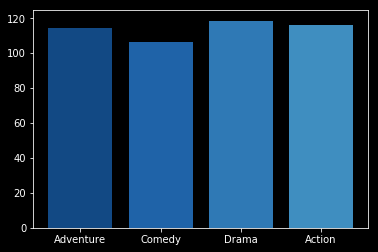

In [130]:
color_palette = sns.color_palette("RdBu_r", 20)
plt.style.use('dark_background')
plt.bar(genres,run_time,color=color_palette)
#plt.bar(genres,budget,color='r')


<BarContainer object of 4 artists>

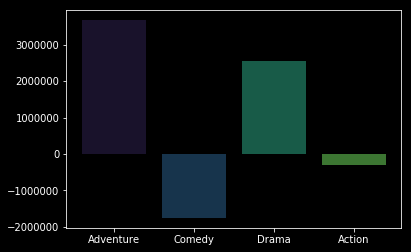

In [128]:
color_palette = sns.color_palette("cubehelix",10)
plt.style.use('dark_background')
# plt.bar(genres,revenue,color='b')
plt.bar(genres,profit,color=color_palette)

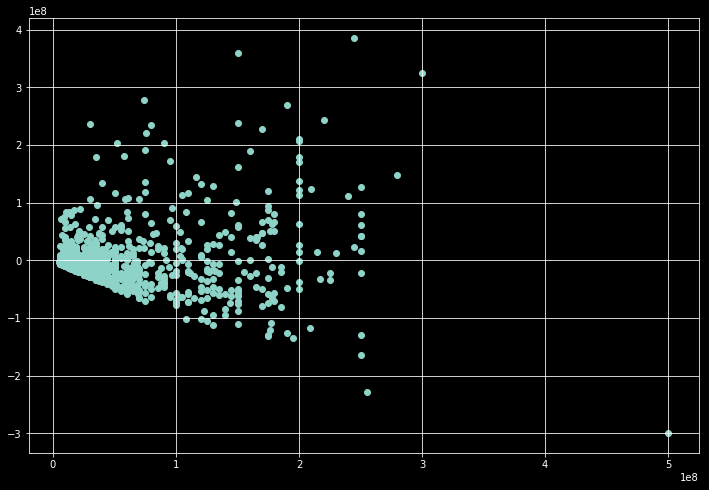

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(df.budget, df.adjusted_profit)
plt.grid(True)

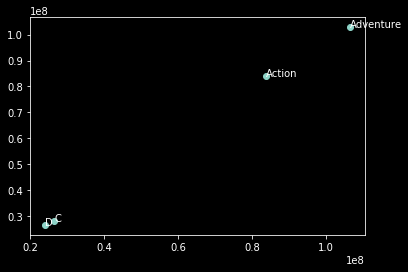

In [102]:
y = budget
z = revenue
n = genres

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [51]:
df.groupby(['genres_1']).mean().sort_values('runtime').reset_index()

,genres_1,budget,popularity,num_genres,imdb_user_reviews,imdb_rating,imdb_critic_reviews,vote_count,runtime,vote_average,year,real_revenue,adjusted_profit,readable_profit
0,Documentary,1.200000e+07,6.626000,2.000000,49.000000,5.900000,65.000000,135.000000,93.000000,6.700000,2012.000000,9.988399e+06,-2.011601e+06,-2.011601
1,Animation,6.901167e+07,12.821627,3.411765,166.551020,6.567347,180.653061,2044.372549,94.843137,6.562745,2014.098039,8.360417e+07,1.459251e+07,14.592506
2,Family,8.165385e+07,22.666231,3.384615,275.923077,6.461538,188.076923,2132.846154,97.384615,6.538462,2015.384615,8.630898e+07,4.655134e+06,4.655134
3,Horror,2.061951e+07,13.565683,2.243902,502.461538,5.912821,291.717949,2301.512195,101.048780,5.895122,2015.341463,3.618937e+07,1.556986e+07,15.569862
4,Comedy,2.816483e+07,10.310418,1.917647,219.284848,6.283636,198.430303,1372.070588,106.345238,6.257059,2014.658824,2.641004e+07,-1.754785e+06,-1.754785
5,Fantasy,8.910875e+07,17.869667,3.333333,555.904762,6.280952,224.285714,2501.416667,107.041667,6.308333,2014.791667,8.026027e+07,-8.848482e+06,-8.848482
6,Music,2.775000e+07,7.127750,2.000000,95.750000,6.400000,135.500000,451.750000,109.000000,6.600000,2013.000000,1.772779e+07,-1.002221e+07,-10.022209
7,Romance,2.809985e+07,9.870679,3.035714,196.653846,6.261538,192.807692,1479.142857,111.928571,6.378571,2014.642857,2.233204e+07,-5.767812e+06,-5.767812
8,Thriller,3.151371e+07,12.738052,2.965517,322.800000,6.354545,259.472727,1528.448276,113.206897,6.256897,2014.879310,1.848104e+07,-1.303266e+07,-13.032665
9,Mystery,3.559000e+07,15.860583,3.000000,399.166667,5.925000,216.416667,2274.666667,114.500000,6.108333,2016.750000,3.729734e+07,1.707338e+06,1.707338


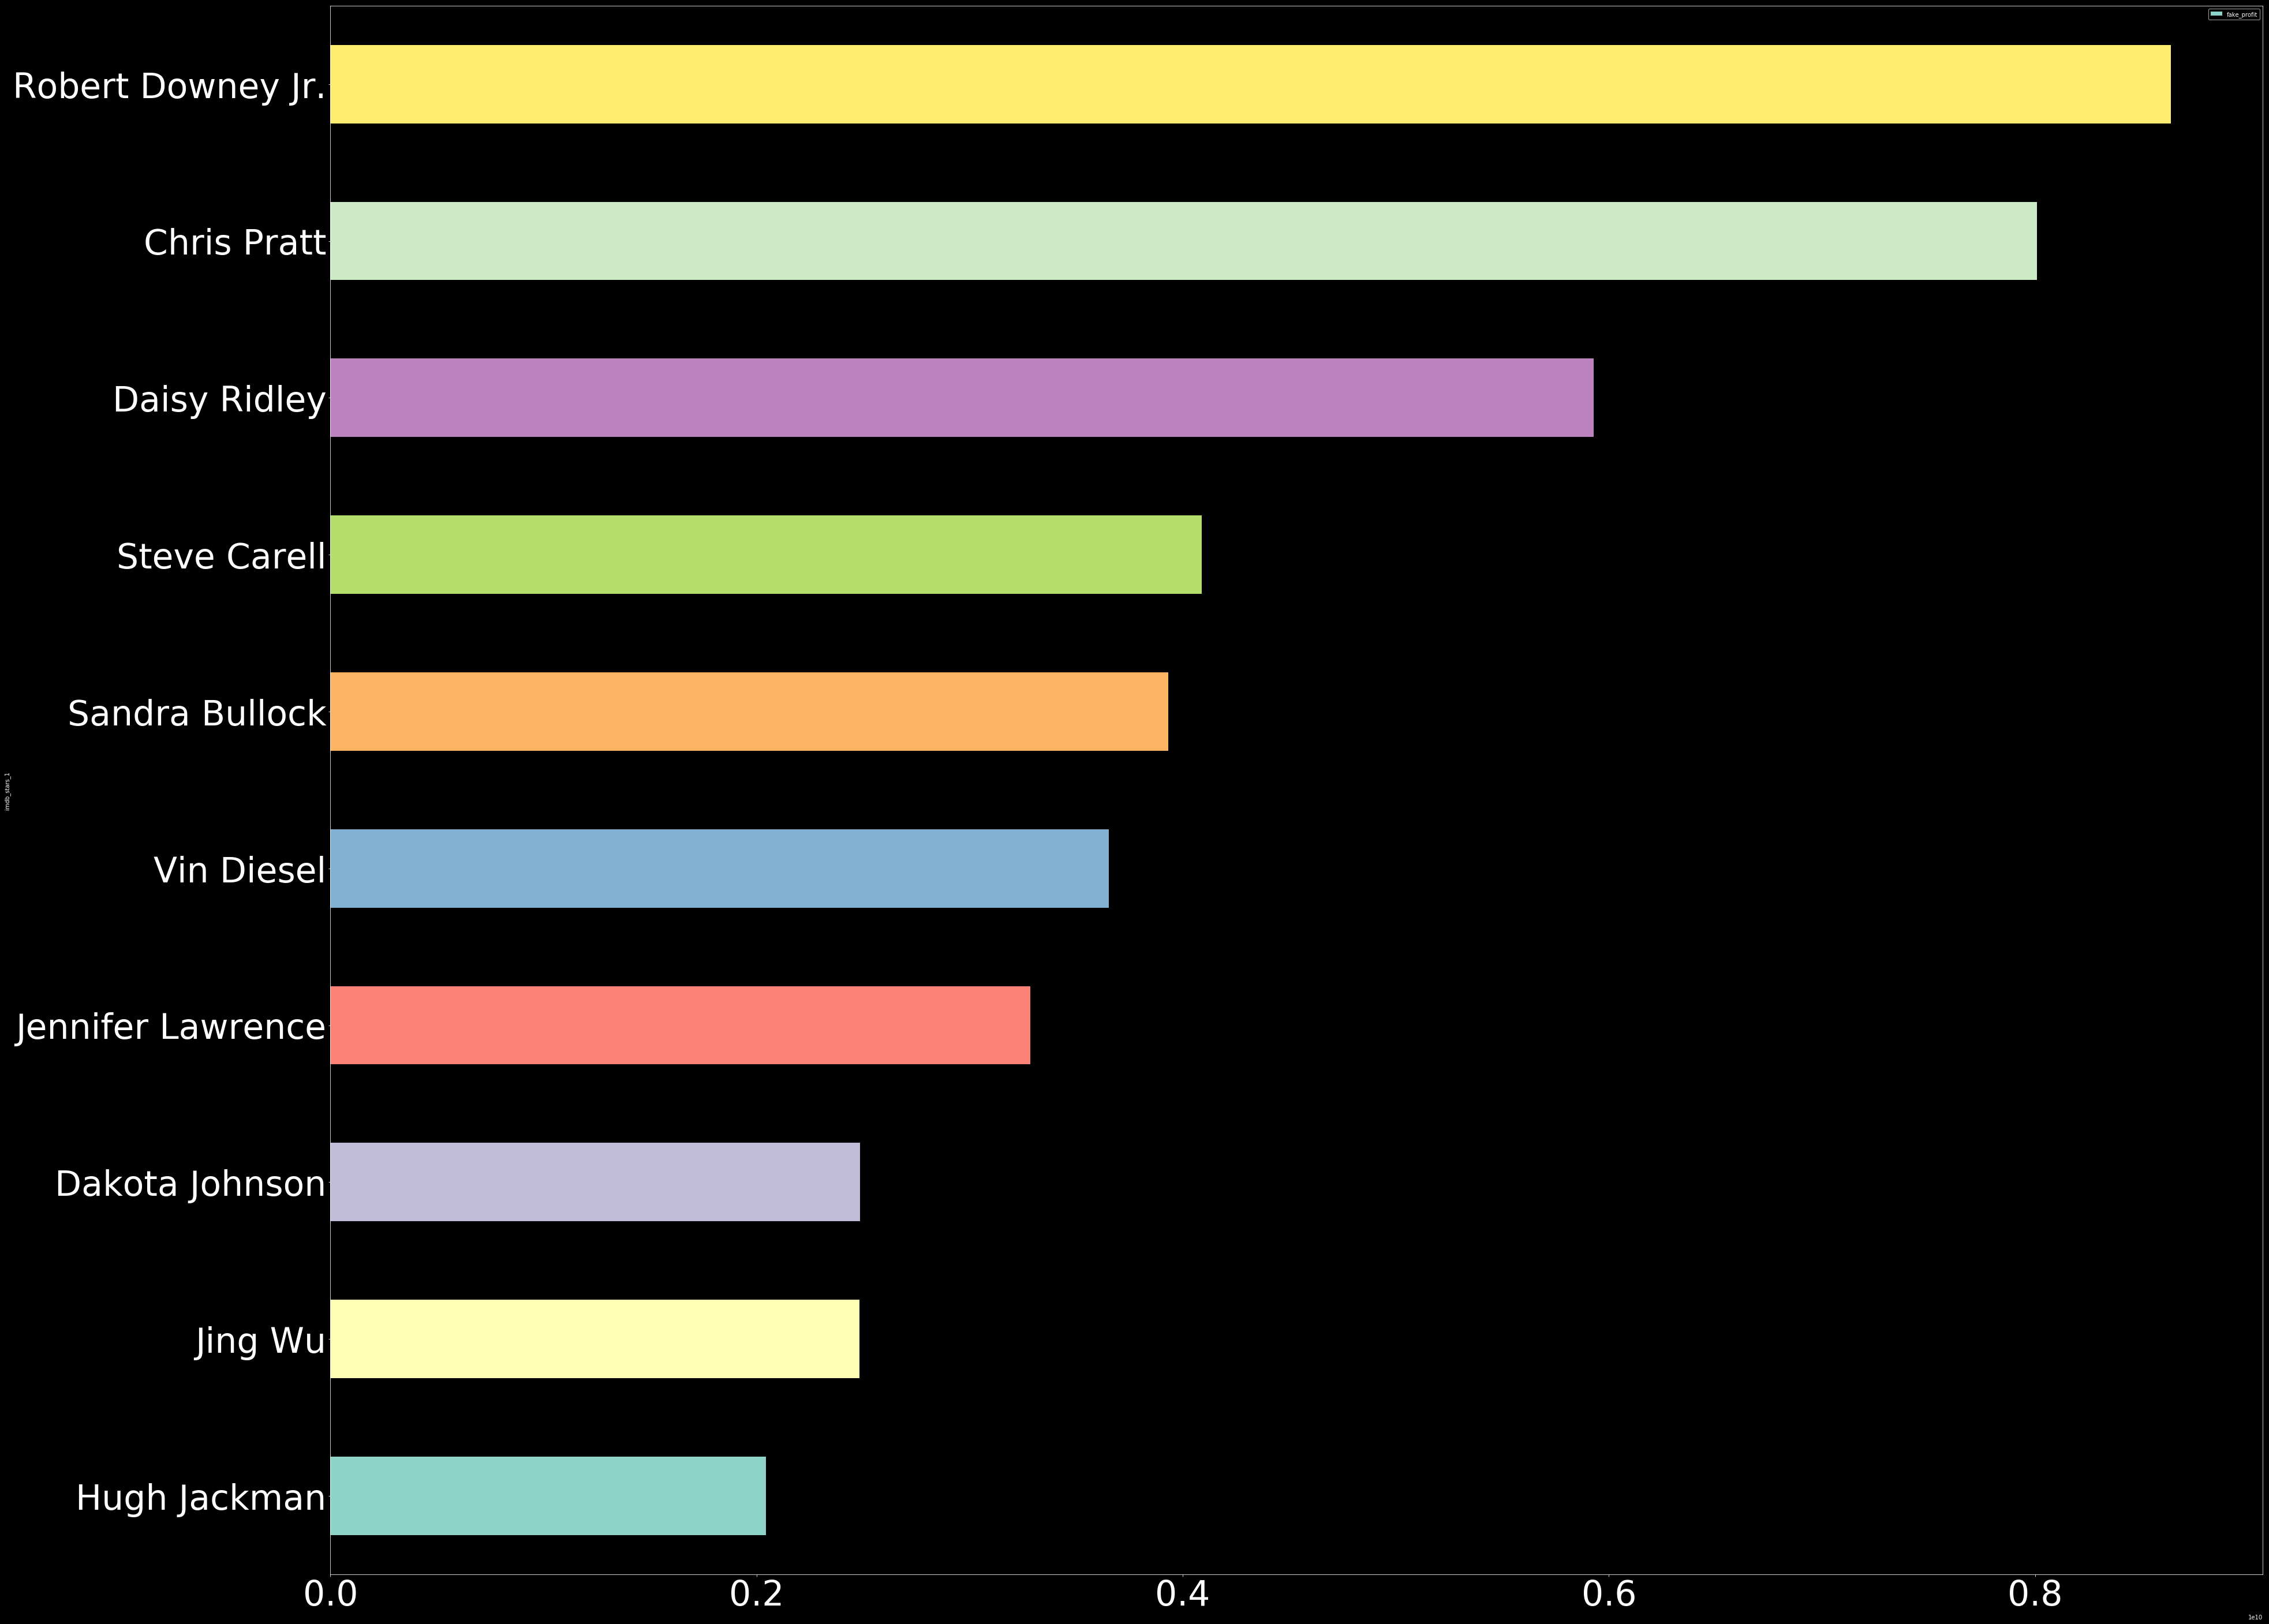

In [39]:
plt.style.use('dark_background')
stars[-10:].plot(kind='barh',x='imdb_stars_1',y='fake_profit',figsize=(60,50))
plt.tick_params(axis='both', which='major', labelsize=60)

plt.show()

In [83]:
#find  all the correlations, with min and max cutoffs
def find_all_cors(df_name, cutoff=0.3, upper_cutoff=0.995):
    cor_cols= list(df_name.describe().columns)
    corrs=[]
    for i in range (len(cor_cols)):
        for j in range(i):
            cola=cor_cols[i]
            colb=cor_cols[j]
            c=df_corr(cola, colb, df=df_name)
            if upper_cutoff>abs(c)>cutoff:
                corrs.append([cola, colb, c]) 
    return corrs

In [84]:
find_all_cors(df)

[['popularity', 'budget', 0.30256275363485136],
 ['imdb_rating', 'imdb_user_reviews', 0.32140039125142167],
 ['imdb_critic_reviews', 'imdb_user_reviews', 0.6017944477075888],
 ['imdb_critic_reviews', 'imdb_rating', 0.3340885472030342],
 ['vote_count', 'budget', 0.5483041849604576],
 ['vote_count', 'popularity', 0.34594548333037534],
 ['vote_count', 'imdb_user_reviews', 0.694992966745734],
 ['vote_count', 'imdb_rating', 0.3962451273446688],
 ['vote_count', 'imdb_critic_reviews', 0.7008067966753416],
 ['revenue', 'budget', 0.7071699165803557],
 ['revenue', 'popularity', 0.3706476891383551],
 ['revenue', 'imdb_user_reviews', 0.5962272076540075],
 ['revenue', 'imdb_critic_reviews', 0.5212676684915674],
 ['revenue', 'vote_count', 0.7577022744795974],
 ['vote_average', 'imdb_user_reviews', 0.3153879589126198],
 ['vote_average', 'imdb_rating', 0.9426977104483609],
 ['vote_average', 'imdb_critic_reviews', 0.30066171658267576],
 ['vote_average', 'vote_count', 0.4109647335715586],
 ['vote_averag

In [255]:

y=movies['budget'].dropna()
x=movies['vote_count'].dropna()

In [267]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies[col].idxmax()
    top_df = pd.DataFrame(movies.loc[top])
    
    bottom = movies[col].idxmin()
    bottom_df = pd.DataFrame(movies.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('imdb_critic_reviews')

,347,166
belongs_to_collection,NaN,NaN
budget,1.95e+07,1e+07
genres_1,Drama,War
genres_2,Fantasy,Drama
genres_3,Romance,Adventure
genres_4,NaN,Action
genres_5,NaN,NaN
genres_6,NaN,NaN
genres_7,NaN,NaN
homepage,http://www.foxsearchlight.com/theshapeofwater/,NaN


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


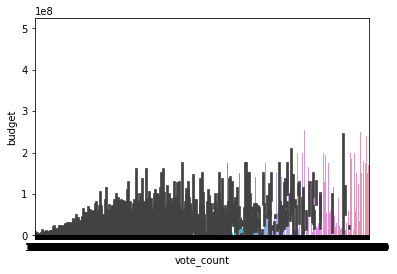

In [253]:
sns.barplot(x[:19576],y[:19576])

In [148]:
x[['imdb_meta_score','title','budget','production_companies_1','vote_count']][:200]

,imdb_meta_score,title,budget,production_companies_1,vote_count
0,64.0,Captain Marvel,152000000.0,Marvel Studios,2894.0
1,NaN,How to Train Your Dragon: The Hidden World,129000000.0,DreamWorks Animation,1137.0
2,81.0,Us,20000000.0,Monkeypaw Productions,347.0
3,66.0,Bumblebee,135000000.0,Hasbro,1574.0
4,NaN,The Mule,50000000.0,Imperative Entertainment,977.0
5,NaN,Master Z: Ip Man Legacy,0.0,Pegasus Motion Pictures,95.0
6,68.0,Avengers: Infinity War,300000000.0,Marvel Studios,12289.0
7,NaN,Fate/stay night: Heaven’s Feel II. lost butterfly,0.0,TYPE-MOON,27.0
8,57.0,Happy Death Day 2U,9000000.0,Digital Riot Media,465.0
9,55.0,Aquaman,160000000.0,DC Comics,4872.0


In [58]:
movies['imdb_critic_reviews'].isna().sum()

2176

In [59]:
movies.isna().sum()

Unnamed: 0                     0
Unnamed: 0.1                   0
adult                          0
backdrop_path                381
belongs_to_collection      15951
budget                         0
genres_1                     124
genres_2                    4691
genres_3                   11195
genres_4                   16607
genres_5                   18827
genres_6                   19424
genres_7                   19558
genres_8                   19578
genres_9                   19579
homepage                   14614
id                             0
imdb_id                        1
original_language              0
original_title                 0
overview                     236
popularity                     3
poster_path                   50
production_companies_1      1368
production_companies_10    19373
production_companies_11    19414
production_companies_12    19457
production_companies_13    19491
production_companies_14    19504
production_companies_15    19518
          

In [259]:
movies.groupby(['production_companies_1']).sum()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,num_genres,imdb_critic_reviews,imdb_meta_score,imdb_popularity,imdb_rating,imdb_rating_count,imdb_user_reviews
production_companies_1,,,,,,,,,,,,,,
(주)큐로홀딩스,0.000000e+00,438798.0,4.020,0.000000e+00,125.0,6.9,34.0,2.0,17.0,0.0,0.0,6.5,1189.0,5.0
.406 Production,0.000000e+00,16375.0,3.485,0.000000e+00,99.0,6.4,38.0,1.0,34.0,44.0,0.0,7.0,4828.0,54.0
01 Distribution,0.000000e+00,306523.0,5.004,0.000000e+00,96.0,5.6,170.0,1.0,5.0,0.0,0.0,5.7,846.0,0.0
10 West Studios,0.000000e+00,434767.0,3.610,0.000000e+00,111.0,7.4,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Bares,2.200000e+07,153158.0,7.481,2.400000e+07,106.0,6.1,184.0,3.0,88.0,38.0,0.0,6.5,8131.0,27.0
1000 Volt,0.000000e+00,74879.0,6.661,1.387300e+05,150.0,7.5,175.0,2.0,180.0,82.0,0.0,7.9,34184.0,107.0
10th Hole Productions,4.500000e+06,41556.0,8.012,1.238200e+05,95.0,4.8,136.0,3.0,37.0,43.0,3816.0,5.1,11005.0,41.0
10th Street Entertainment,0.000000e+00,327331.0,69.684,0.000000e+00,107.0,7.2,105.0,3.0,42.0,37.0,6.0,7.1,11735.0,234.0
11:11 Mediaworks,2.500000e+07,806.0,6.502,1.191883e+08,110.0,5.4,509.0,1.0,230.0,43.0,0.0,5.5,53378.0,548.0


In [61]:
movies.loc[movies['budget']].count()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


Unnamed: 0                 12119
Unnamed: 0.1               12119
adult                      12119
backdrop_path              12118
belongs_to_collection         54
budget                     12119
genres_1                   12118
genres_2                   12107
genres_3                   12081
genres_4                      27
genres_5                      16
genres_6                       0
genres_7                       0
genres_8                       0
genres_9                       0
homepage                   12085
id                         12119
imdb_id                    12118
original_language          12119
original_title             12119
overview                   12119
popularity                 12119
poster_path                12119
production_companies_1     12116
production_companies_10        0
production_companies_11        0
production_companies_12        0
production_companies_13        0
production_companies_14        0
production_companies_15        0
          